Name: Gautami Kant
Andrew ID: gkant

## Summary of steps performed and observations:

### Part 1

EDA:
a. Checked for non-numerical - object columns. There's only 1 which is the ID column. Also, confirmed that ID has all distinct values
b. There are no nulls present in the data
c. 70 columns have constant values. Since that's ~7% of the no. of columns, have left it in the data
d. Created the correlation matrix for the columns. However, since the no. of columns is high, seeing the correlation between 2 columns is difficult


### Part 2

UMAP Dimensionality Reduction:
Performed UMAP dimensionality reduction which is non-linear. Dimensionality reduction done for visualization in 2D. Changed the parameters n_neighbors=100 (default is 15) and min_dist=1 (default is 0.1) for the best visualization.


### Part 3

Clustering: Built 7 clustering models based on different algorithms, distance measures, parameters etc. mentioned below.

1) K-Means clustering
a. Elbow method: Plotted to find the optimal number of clusters which came to be 10
b. Model 1: Clear and separate clusters can be observed

2) DBSCAN
a. Model 2: Euclidean: Clusters are not as well separated, there is some mixing
b. Model 3: Cosine: No mixing, well separated clusters
c. Model 4: Manhattan: Probably the worst of models 1,2,3,4. There is quite some mixing

3) Agglomerative Clustering
a. Model 5: Euclidean: Very little mixing, but otherwise well separated clusters
b. Model 6: Cosine: Clusters are not as well separated, there is some mixing
c. Model 7: Manhattan: Clusters are not as well separated, there is some mixing

Models 1 (K-means) and 3 (DBSCAN with cosine distance) are the best of all models considering visual appearance.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [21]:
## Load the file
df = pd.read_csv(r"C:\Users\kantg\OneDrive\Desktop\CMU\ML for Science\Lab 2\Lab2_clustering_dataset.csv") # Loading the csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


In [22]:
## Rough look at the data
df.head() #There's only 1 non-numeric column. Looks like ID is the one

,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1


In [23]:
## Non-numeric columns

print(df.select_dtypes(include=['object']).columns.tolist()) # Checking the non-numeric column, it is ID
print(df['ID'].nunique()) #Checking that the ID column has all unique values, no duplicates.


['ID']
969


In [24]:
## Null Values
print(df.isna().sum().sum()) # No. of observations with null values. No null values

0


In [25]:
## Checking for attributes with constant values throughout.
const = []
for i in range(0,len(df)):
 if len(df.iloc[:,i].unique()) == 1:
  const.append(i)
print(len(const)) ## 70 fields have constant values throughout
print(len(const)/len(df)) ## 7% fields have constant values. It's a compariively small percentage, so have included for clustering

70
0.07223942208462332


In [26]:
X = df.iloc[: , 1:] #Drop the first column

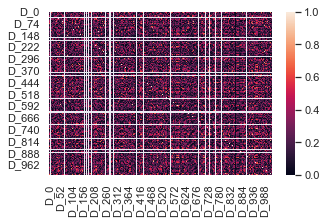

In [27]:
sns.heatmap(df.corr().abs())
sns.set(rc={'figure.figsize':(20,8)})

In [28]:
## Scaling data to convert into between -1 to 1

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X_scaled = pd.DataFrame(scaler.transform(X),columns= X.columns, index = X.index) 


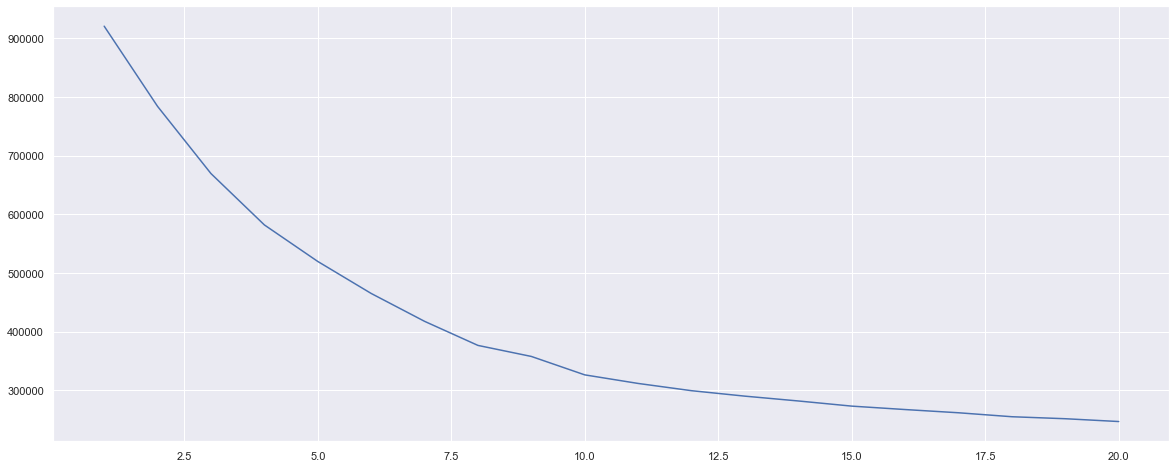

In [29]:
## Using elbow method to find the number of clusters

#Running K-Means with a range of k
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["OMP_NUM_THREADS"] = '4'
from sklearn.cluster import KMeans

wcss = []
for k in range(1,21):
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(X_scaled)
    wcss.append(kmeanModel.inertia_)
    
#Plotting the distortions of K-Means
ks = range(1,21)
sns.lineplot(x = ks, y = wcss);

In [30]:
## KMeans clustering

kmeans = KMeans(n_clusters=10, random_state=6).fit(X_scaled) # Initially, selected no. of clusters as 3. Will tune in the next section
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)
kmean_labels = kmeans.labels_

X_with_kmeans = X_scaled
X_with_kmeans['label_kmeans'] = kmean_labels



<AxesSubplot:>

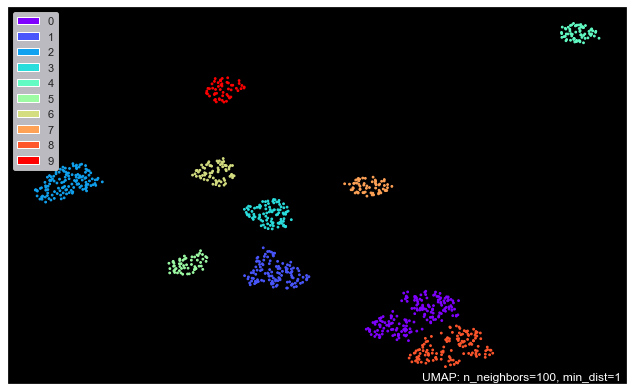

In [31]:
## Visualize using UMAP

import umap
import umap.plot

mapper = umap.UMAP(random_state=10, n_components=2,n_neighbors=100, min_dist= 1).fit(X_scaled)
umap_2d = mapper.fit_transform(X_scaled)

umap.plot.points(mapper , kmean_labels , theme='fire', width = 800, height = 500 )

## Other clustering algorithms: DBSCAN and Agglomerative Clustering using different distances (Euclidean, Cosine, Manhattan)

## DBSCAN

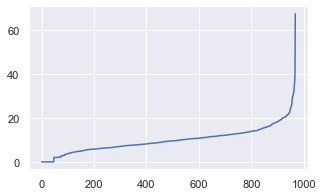

In [32]:
#DBSCAN

#Compute data proximity from each other using Nearest Neighbours
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighbours.fit(X_scaled) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_scaled) # finding the nearest neighbours

#Sorting and plot the distances between the data points
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot


<AxesSubplot:>

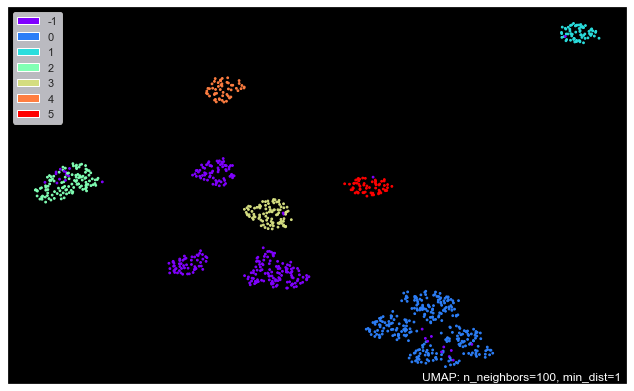

In [33]:
## Model 2: DBSCAN model with Euclidean distance

from sklearn.cluster import DBSCAN
# cluster the data
dbscan = DBSCAN(eps = 20, min_samples = 30, metric = 'euclidean').fit(X_scaled) # fitting the model
dbscan_labels = dbscan.labels_ # getting the labels

X_with_dbscan = X_scaled
X_with_dbscan['label_dbscan'] = dbscan_labels

# Plot the clusters
umap.plot.points(mapper , dbscan_labels , theme='fire', width = 800, height = 500 )

<AxesSubplot:>

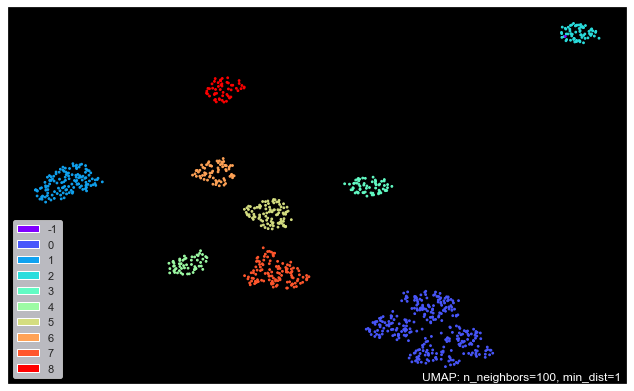

In [34]:
## Model 3: DBSCAN model with Cosine distance

# cluster the data
dbscan = DBSCAN(eps = 0.5, min_samples = 30, metric = 'cosine').fit(X_scaled) # fitting the model
dbscan_labels = dbscan.labels_ # getting the labels

X_with_dbscan_cosine = X_scaled
X_with_dbscan_cosine['label_dbscan'] = dbscan_labels

# Plot the clusters
umap.plot.points(mapper , dbscan_labels , theme='fire', width = 800, height = 500 )


<AxesSubplot:>

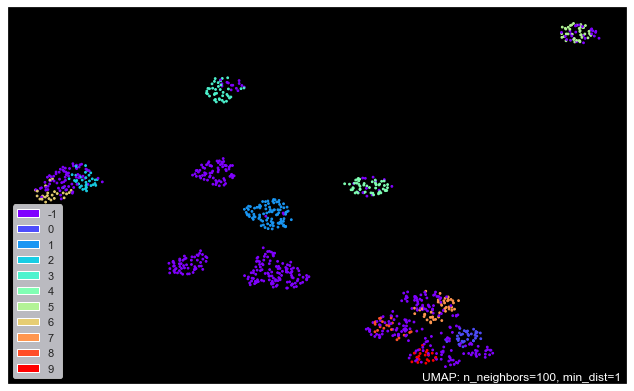

In [35]:
## Model 4: DBSCAN model with Manhattan distance

# cluster the data
dbscan = DBSCAN(eps = 100, min_samples = 20, metric = 'manhattan').fit(X_scaled) # fitting the model
dbscan_labels = dbscan.labels_ # getting the labels

X_with_dbscan_man = X_scaled
X_with_dbscan_man['label_dbscan'] = dbscan_labels 

# Plot the clusters
umap.plot.points(mapper , dbscan_labels , theme='fire', width = 800, height =500 )


## Agglomerative Clustering

<AxesSubplot:>

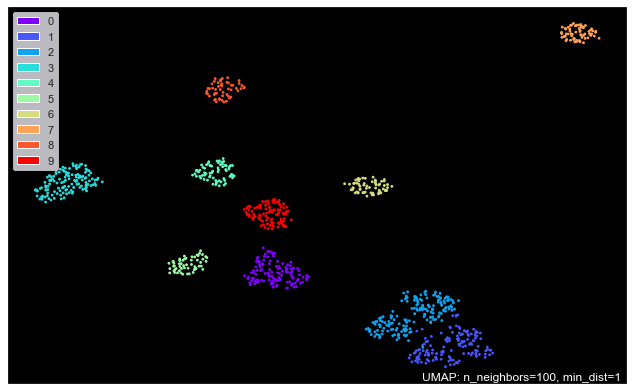

In [36]:
## Model 5: Agglomerative Clustering with Euclidian distance

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)
agglomerative_labels = cluster.labels_ #getting labels

X_with_agglomerative = X_scaled
X_with_agglomerative['label_agg'] = agglomerative_labels 

# Plot the clusters
umap.plot.points(mapper , agglomerative_labels , theme='fire', width = 800, height =500 )

<AxesSubplot:>

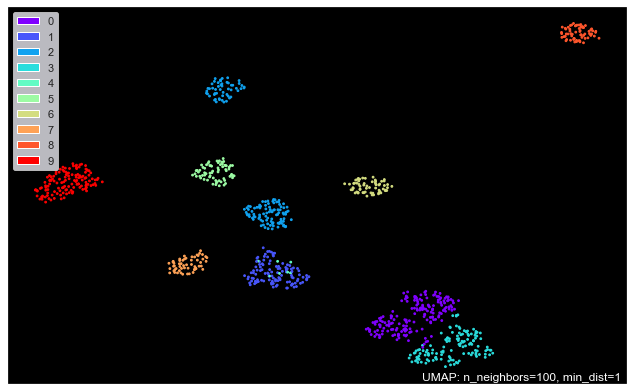

In [37]:
## Model 6: Agglomerative Clustering with Cosine distance

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='complete')  
cluster.fit_predict(X_scaled)
agglomerative_labels = cluster.labels_ #getting labels

X_with_agglomerative = X_scaled
X_with_agglomerative['label_agg'] = agglomerative_labels 

# Plot the clusters
umap.plot.points(mapper , agglomerative_labels , theme='fire', width = 800, height =500 )

<AxesSubplot:>

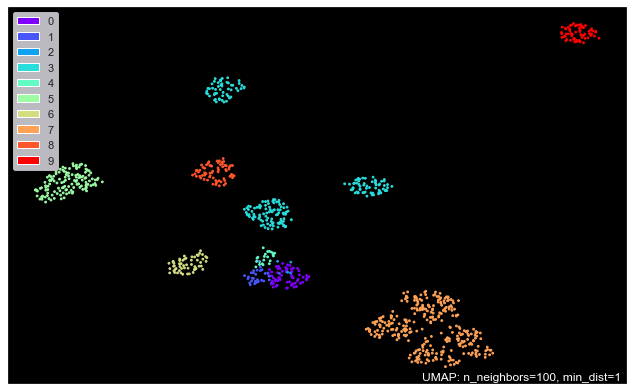

In [38]:
## Model 7: Agglomerative Clustering with Manhattan distance

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='manhattan', linkage='complete')  
cluster.fit_predict(X_scaled)
agglomerative_labels = cluster.labels_ #getting labels

X_with_agglomerative = X_scaled
X_with_agglomerative['label_agg'] = agglomerative_labels 

# Plot the clusters
umap.plot.points(mapper , agglomerative_labels , theme='fire', width = 800, height =500 )